In [1]:
import itertools
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import Image

In [5]:
G_karate = nx.karate_club_graph()
pos=nx.spring_layout(G_karate)

## Plot & describe graph

In [6]:
def plot_graph(graph, 
               hilight_path=None, 
               node_size=400, with_labels=True, 
               cmap = plt.get_cmap('YlOrRd'), **kwargs):
    
    if hilight_path:       
        revers_hilight_path = [tuple((y,x)) for (x,y) in hilight_path]
        not_hilight_edges = set(graph.edges) - set(hilight_path) - set(revers_hilight_path)
        all_edges = list(not_hilight_edges)
        all_edges.extend(hilight_path)
        all_colors = list('k'*len(not_hilight_edges))
        all_colors.extend('r'*len(hilight_path))

        nx.draw(graph, 
                edgelist=all_edges, edge_color=all_colors, 
                node_size=node_size, with_labels=with_labels, 
                cmap=cmap, **kwargs)
    else:
        nx.draw(graph, 
                node_size=node_size, with_labels=with_labels,
                cmap=cmap, **kwargs)

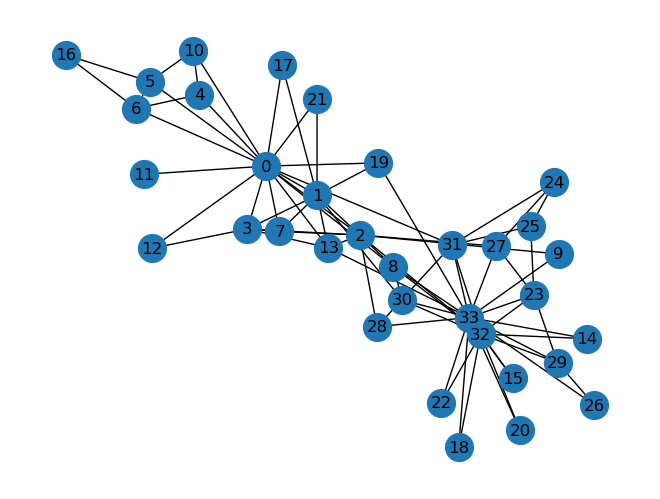

In [7]:
plot_graph(G_karate, pos=pos)

In [8]:
def get_graph_features(graph, verbose=True):
    degree_sequence = list(graph.degree())
    graph_f = {
        "nb_nodes": len(nx.spring_layout(graph)),
        "nb_arr": len(graph.edges()),
        "avg_degree": np.mean(np.array(degree_sequence)[:,1]),
        "med_degree": np.median(np.array(degree_sequence)[:,1]),
        "max_degree": max(np.array(degree_sequence)[:,1]),
        "min_degree": np.min(np.array(degree_sequence)[:,1])
    }
    if verbose:
        for (c, v) in graph_f.items():
            print(c, " = ", v)
    return graph_f

In [9]:
karate_ch = get_graph_features(G_karate)

nb_nodes  =  34
nb_arr  =  78
avg_degree  =  4.588235294117647
med_degree  =  3.0
max_degree  =  17
min_degree  =  1


In [10]:
def plot_degree_histogram(praph):
    plt.figure(figsize=(12, 8))
    plt.stem(np.array(nx.degree_histogram(praph)).astype('float'))
    plt.ylabel("Frequence")
    plt.xlabel("Degre")
    plt.show()

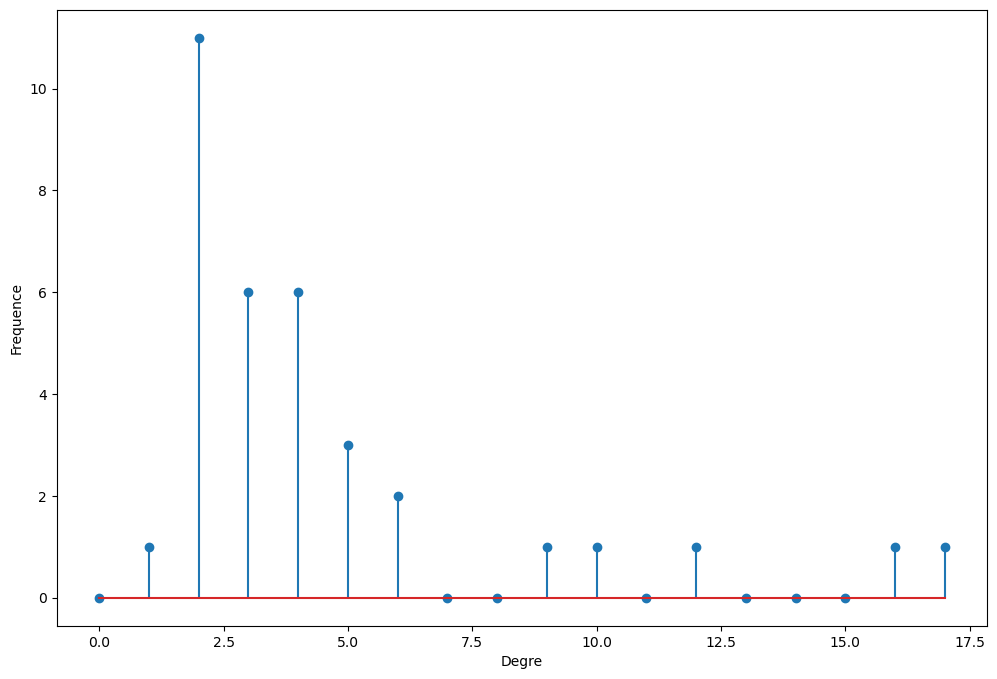

In [11]:
plot_degree_histogram(G_karate)

#### Erdos-Rényi 

In [22]:
p=0.2
G_erdos_50 = nx.erdos_renyi_graph(n=50, p=p)
G_erdos_500 = nx.erdos_renyi_graph(n=500, p=p)

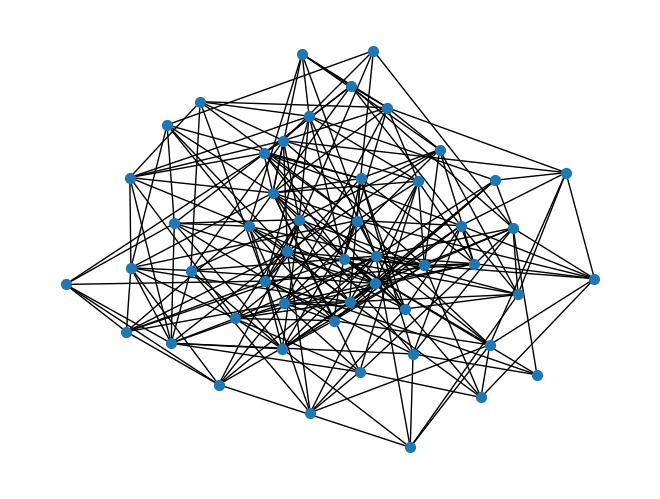

In [23]:
plot_graph(G_erdos_50, node_size=50, with_labels=False)

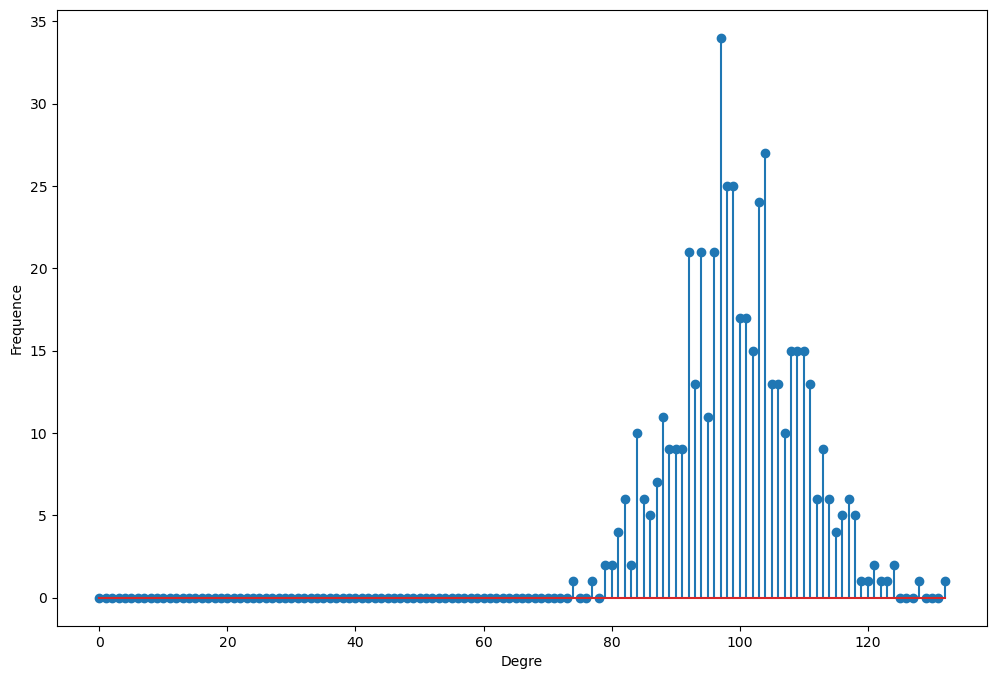

In [24]:
plot_degree_histogram(G_erdos_500)

In [25]:
G_erdos_f = get_graph_features(G_erdos_500)

nb_nodes  =  500
nb_arr  =  24982
avg_degree  =  99.928
med_degree  =  99.0
max_degree  =  132
min_degree  =  74


In [26]:
print(f"""expect that mean degree is {G_erdos_f["avg_degree"]=} =~ {(G_erdos_f["nb_nodes"] -1)*p=}""")

expect that mean degree is G_erdos_f["avg_degree"]=99.928 =~ (G_erdos_f["nb_nodes"] -1)*p=99.80000000000001


#### Barabasi-Albert

In [27]:
G_barabasi_500 = nx.barabasi_albert_graph(n=500,m=3)
G_barabasi_500_f = get_graph_features(G_barabasi_500)

nb_nodes  =  500
nb_arr  =  1491
avg_degree  =  5.964
med_degree  =  4.0
max_degree  =  77
min_degree  =  3


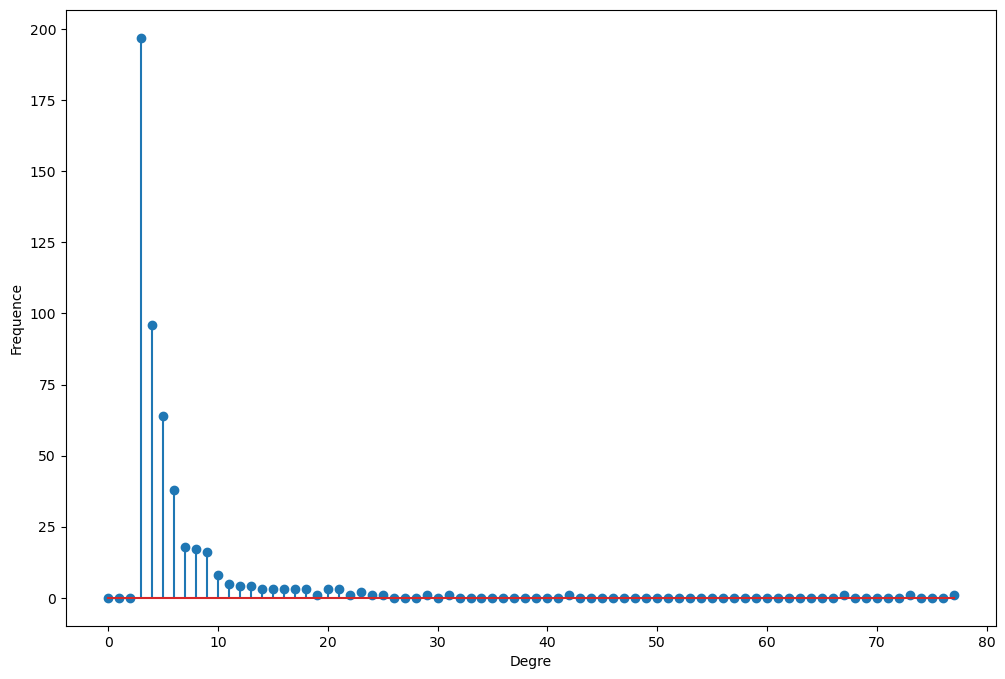

In [28]:
plot_degree_histogram(G_barabasi_500)

## Pathfinding algoritms

#### Dijkstra’s algorithm

In [29]:
path_0_26 = nx.shortest_path(G_karate)[0][26]
path_0_26

[0, 8, 33, 26]

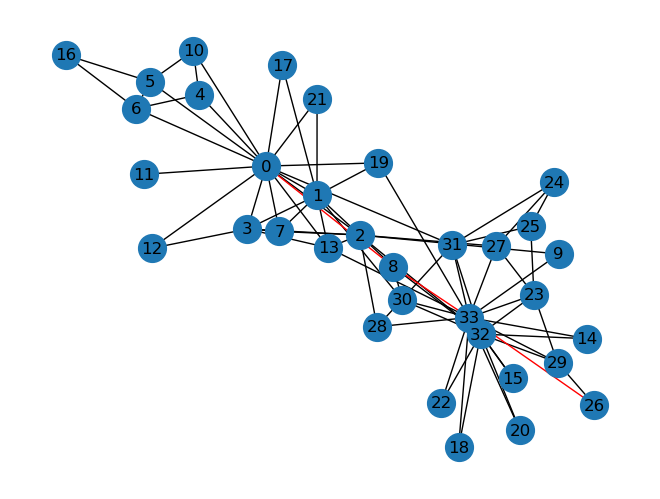

In [30]:
hilight_path = [tuple([x, path_0_26[num+1]]) for num, x in enumerate(path_0_26[:-1])]
plot_graph(G_karate, pos=pos, hilight_path=hilight_path)

In [31]:
# faster than shortest_path, return len of paths between nodes, perfect to find the shorter way task
list(nx.all_pairs_shortest_path_length(G_karate))[0][1][26]

3

#### Minimum spanning tree

In [32]:
from networkx.algorithms import tree

In [33]:
# tree with minimal sum of weights for connecting all nodes
mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = sorted(list(mst))
edgelist[:5]

[(0, 3), (0, 4), (0, 5), (0, 7), (0, 8)]

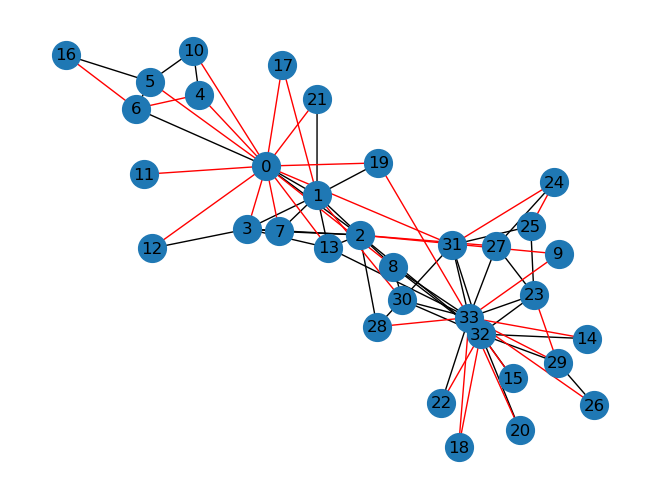

In [34]:
plot_graph(G_karate, pos=pos, hilight_path=edgelist)

In [35]:
print(f"""{len(edgelist)/len(G_karate.edges)*100} % edges enough in this case 
to connect each one node with minimal sum of edges""")

42.30769230769231 % edges enough in this case 
to connect each one node with minimal sum of edges


## Community detection

#### Girvan Newman algorithm

In [36]:
from networkx.algorithms import community

In [37]:
def get_community_nodes(graph, k):
    assert k >= 1
    comp = community.girvan_newman(G_karate)
    return list(comp)[k-2]

In [38]:
get_community_nodes(G_karate, k=4)

({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {4, 5, 6, 10, 16},
 {9})

#### Louvain method

In [39]:
import community as louvain_community

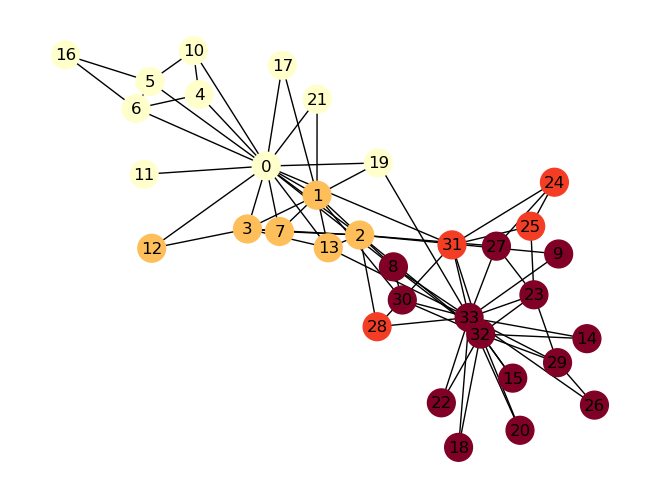

In [40]:
partition = louvain_community.best_partition(G_karate)
plot_graph(G_karate, pos=pos, node_color=list(partition.values()))

#### Hierarchical clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
n = len(G_karate)
all_length=list(nx.all_pairs_shortest_path_length(G_karate))
distances_arr = np.array([[all_length[i][1][j] for i in range(n)] for j in range(n)])

clustering = AgglomerativeClustering(n_clusters=4,
                                     linkage='average', # 'ward', 'complete', 'average', 'single'
                                     affinity='precomputed').fit_predict(distances_arr)

In [43]:
clustering_coefficient = np.mean(list(nx.clustering(G_karate).values()))
clustering_coefficient

0.5706384782076823

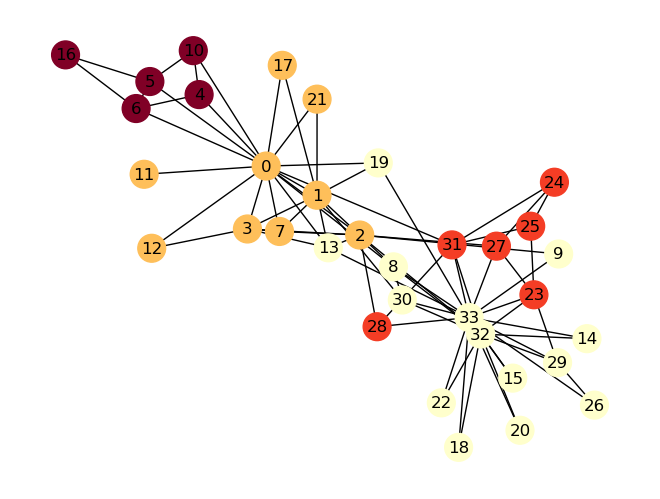

In [44]:
plot_graph(G_karate, pos=pos, node_color=clustering)

#### Dendrogram

In [45]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage

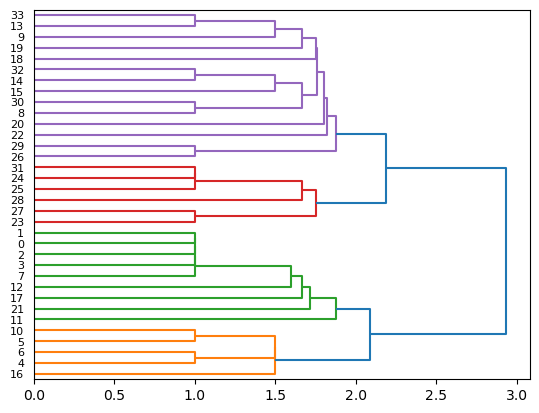

In [46]:
square_arr = squareform(distances_arr)
linkage_matrix = linkage(square_arr, "average") # 'ward', 'complete', 'average', 'single'
d = dendrogram(linkage_matrix, orientation='right')

## Centrality algorithms

#### PageRank Google Algorithm

In [47]:
def get_top(input_dict, top=5):
    return sorted(input_dict.items(), key=lambda item: float(item[1]), reverse=True)[:top]

In [48]:
page_runk = nx.pagerank(G_karate, alpha=0.85)
get_top(page_runk)

[(33, 0.09698041880501741),
 (0, 0.08850807396280012),
 (32, 0.07592643687005646),
 (2, 0.06276686454603017),
 (1, 0.057414840497110056)]

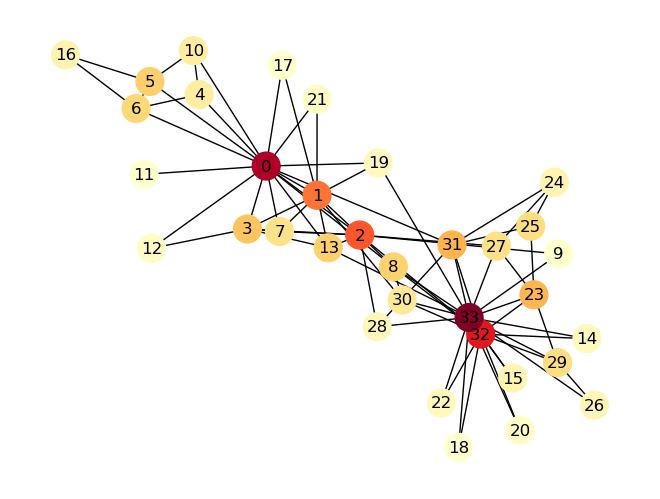

In [49]:
plot_graph(G_karate, pos=pos, node_color = list(page_runk.values()))

#### Count of connection per node

In [50]:
count_degree = dict(G_karate.degree())
get_top(count_degree)

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

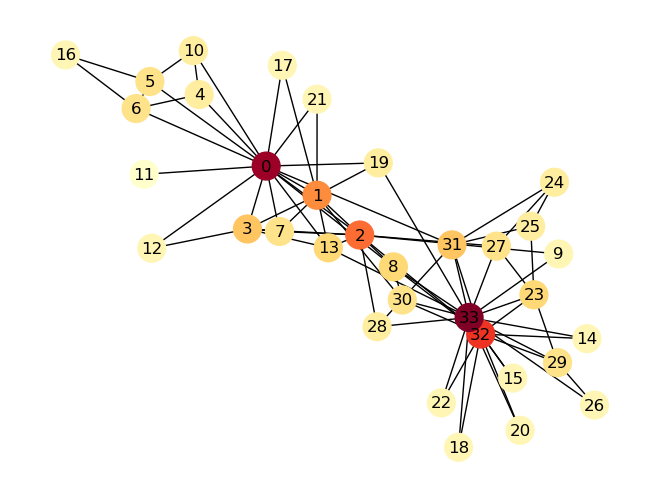

In [51]:
plot_graph(G_karate, pos=pos, node_color = list(count_degree.values()))

#### Degree Centrality

In [52]:
# counts the number of walks of length 1 ending at node
# perfect to find the most influential persons task
degree_centrality = nx.degree_centrality(G_karate)
get_top(degree_centrality)

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727)]

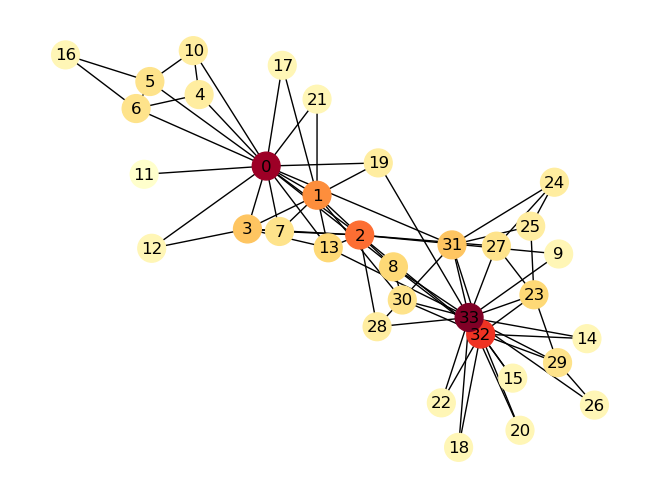

In [53]:
plot_graph(G_karate, pos=pos, node_color = list(degree_centrality.values()))

#### Eigenvector Centrality

In [54]:
# number of walks of infinite length ending in node
eigenvector_centrality = nx.eigenvector_centrality(G_karate)
get_top(eigenvector_centrality)

[(33, 0.373371213013235),
 (0, 0.3554834941851943),
 (2, 0.3171893899684447),
 (32, 0.30865104773369595),
 (1, 0.2659538704545025)]

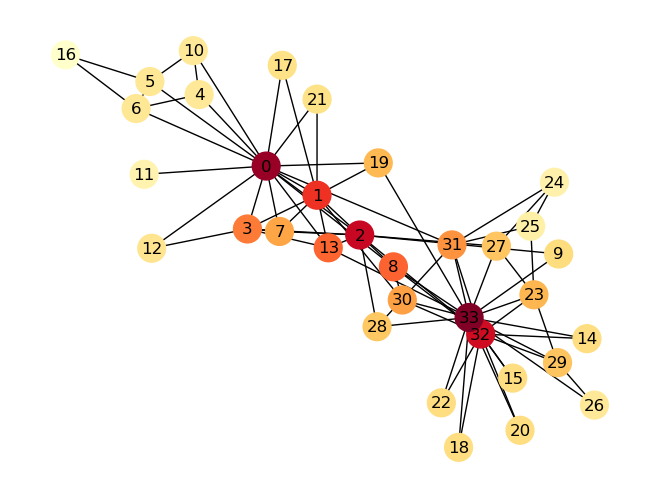

In [55]:
plot_graph(G_karate, pos=pos, node_color = list(eigenvector_centrality.values()))

#### Closeness Centrality

In [56]:
# nodes that more efficiently spread information 
closeness_centrality = nx.closeness_centrality(G_karate)
get_top(closeness_centrality)

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625)]

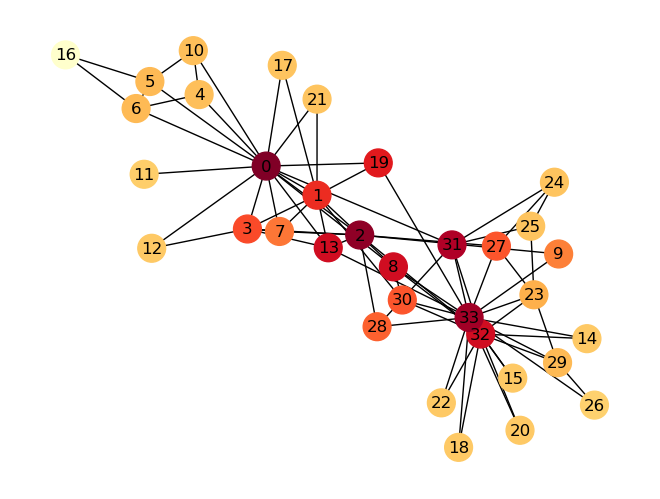

In [57]:
plot_graph(G_karate, pos=pos, node_color = list(closeness_centrality.values()))

#### Betweenness Centrality

In [58]:
# nodes that more influence to information driving
betweenness_centrality = nx.betweenness_centrality(G_karate)
get_top(betweenness_centrality)

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325)]

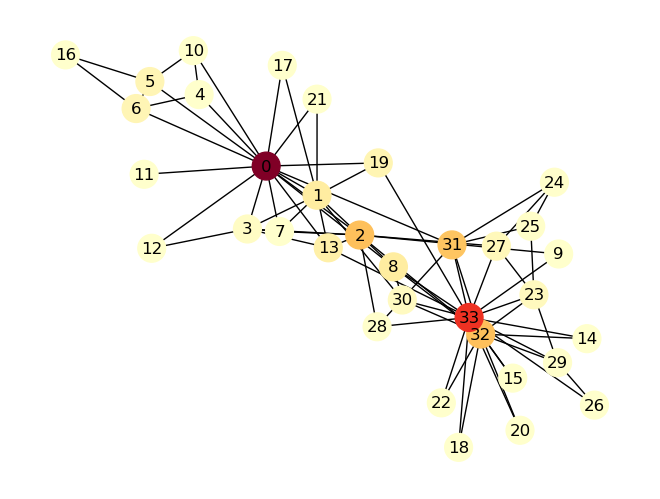

In [59]:
plot_graph(G_karate, pos=pos, node_color = list(betweenness_centrality.values()))